# Understanding Digital Images with Python (cv2 + NumPy)

These tasks are designed to help you explore how digital images are represented and manipulated using NumPy arrays. Follow each step, execute the code, and write your observations. Try to reason about why each transformation works the way it does.

#### imports

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

#### 1. Load and View a Grayscale Image

Start by loading an image in grayscale and displaying it using matplotlib.

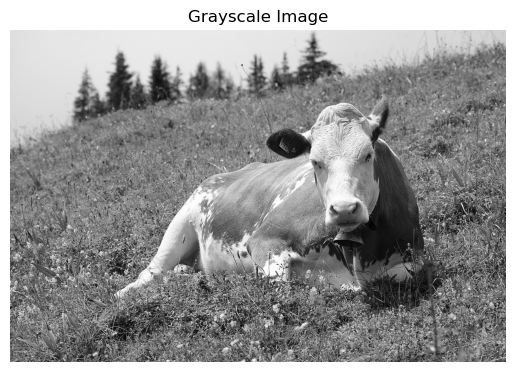

In [4]:
img = Image.open(r"C:\Users\bbuser\Desktop\Cow.jpg").convert('L')

# Display the grayscale image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')
plt.show()

What does the array representation of the image look like?
What is the shape, data type, and pixel range?

In [5]:
img_array = np.array(img) # Convert to NumPy array

print("Array representation:\n", img_array)
print("Shape:", img_array.shape)
print("Data type:", img_array.dtype)
print("Pixel range:", img_array.min(), "to", img_array.max())

Array representation:
 [[222 222 222 ... 210 209 209]
 [222 222 222 ... 210 209 209]
 [222 222 222 ... 210 209 209]
 ...
 [ 63 147 192 ...  78  40  51]
 [127 136 193 ...  59  36  42]
 [134  69  54 ...  38  88  81]]
Shape: (803, 1200)
Data type: uint8
Pixel range: 0 to 255


#### 2. Brighten the Image

Try adding a fixed value (e.g., +50) to all pixel values of the grayscale image.

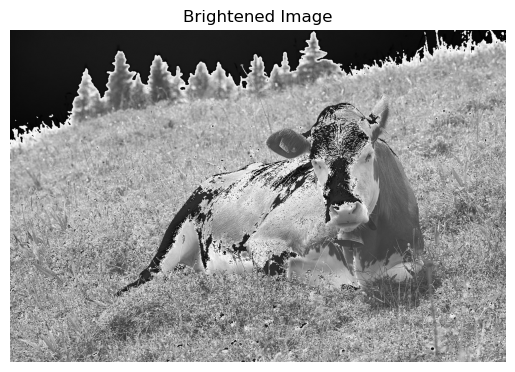

In [10]:
img_array_brighten = np.array(img)
# Brighten by adding 50 
img_array_brighten = img_array_brighten + 50

# Show the brightened image
plt.imshow(img_array_brighten, cmap='gray')
plt.title("Brightened Image")
plt.axis('off')
plt.show()

How does the image change?
What happens if a pixel value exceeds 255?

<span style="color: mediumslateblue">_It is brighter, Pixel values must be between 0 and 255., If you add 50 to a pixel with value 220, the result would be 270 , which wont work._</span>

#### 3. Add a Higher Value

Now try adding a much higher value (e.g., +300) to the image.

In [7]:
img_array_brighten = img_array_brighten + 300 

OverflowError: Python integer 300 out of bounds for uint8

Do you get the result you expect? Can you explain what’s going wrong?

_OverflowError: Python integer 300 out of bounds for uint8_ 

pixel value exceeded 255

Try using np.clip() to keep values between 0 and 255.

In [8]:
img_array_brighten = np.clip(img_array_brighten + 255, 0, 255).astype(np.uint8)

#### 4. Subtract to Darken

Subtract a fixed value (e.g., -100) from the image.

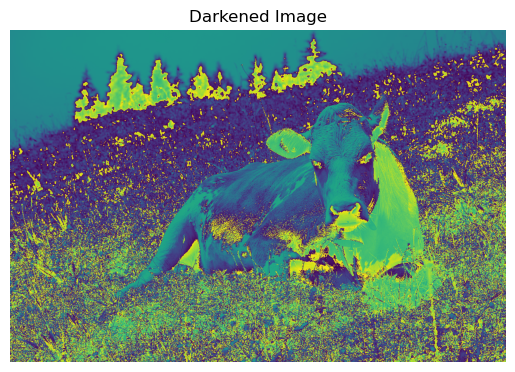

In [22]:
img_array_darken = img_array - 100
plt.imshow(img_array_darken)
plt.title("Darkened Image")
plt.axis('off')
plt.show()

What happens to the dark regions?

Are any values going below 0?

Use .clip(0, 255) to fix underflow and observe the difference.

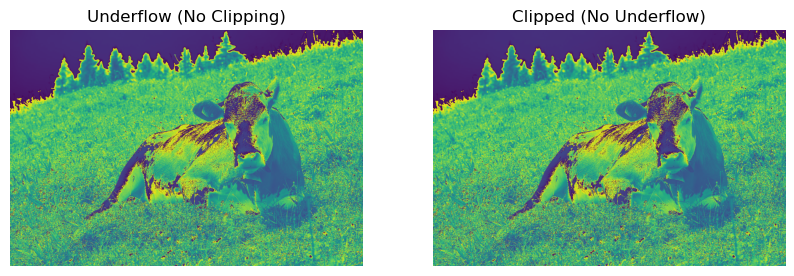

In [23]:
img_array_darken_underflow = img_array - 200

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img_array_darken_underflow)
plt.title("Underflow (No Clipping)")
plt.axis('off')

img_array_darken_clipped = np.clip(img_array - 200, 0, 255)

plt.subplot(1,2,2)
plt.imshow(img_array_darken_clipped)
plt.title("Clipped (No Underflow)")
plt.axis('off')

plt.show()

<span style="color: mediumslateblue">_Subtracting darkens the image; very dark regions may become pure black
Values can go below 0, causing underflow if not clipped.
Clipping fixes this by keeping all values in the valid range (0–255).
._</span>

#### 5. Transpose the Image

Transpose the image array using .T or np.transpose().

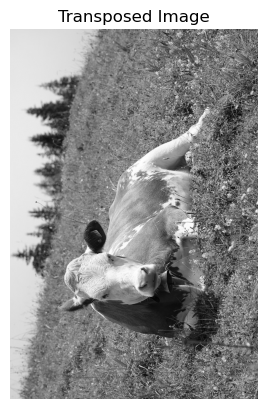

In [25]:
img_array_transposed = img_array.T

plt.imshow(img_array_transposed, cmap='gray')
plt.title("Transposed Image")
plt.axis('off')
plt.show()

- What happens to the orientation of the image?
Does this feel like a flip, a rotation, or something else?

The image appears rotated 90 degrees counterclockwise.

#### 6. Flip the Image Horizontally and Vertically

Use np.fliplr() (left–right) and np.flipud() (up–down).

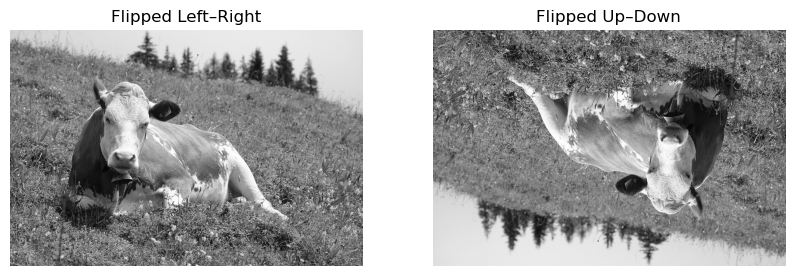

In [16]:
# Flip the image array left–right (horizontal flip)
img_array_fliplr = np.fliplr(img_array)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img_array_fliplr, cmap='gray')
plt.title("Flipped Left–Right")
plt.axis('off')

# Flip the image array up–down (vertical flip)
img_array_flipud = np.flipud(img_array)

plt.subplot(1,2,2)
plt.imshow(img_array_flipud, cmap='gray')
plt.title("Flipped Up–Down")
plt.axis('off')

plt.show()

- How do these flips affect the image visually?
How are they different from transpose?

np.fliplr() (left–right) mirrors the image horizontally, so the left side becomes the right and vice versa.

np.flipud() (up–down) mirrors the image vertically, so the top becomes the bottom and vice versa.

Flipping only reverses the order of rows or columns, keeping the image orientation otherwise unchanged.


#### 7. Slice (Crop) a Section of the Image

Extract a 100×100 region from the center of the image using slicing.

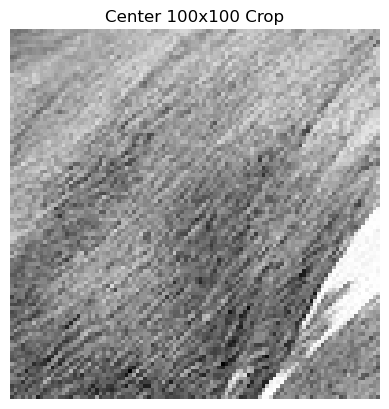

In [26]:
# Extract and display a 100x100 region from the center
plt.imshow(img_array[351:451, 550:650], cmap='gray')
plt.title("Center 100x100 Crop")
plt.axis('off')
plt.show()


- What part of the image are you extracting?

- Try slicing other regions — top-left, bottom-right, etc.

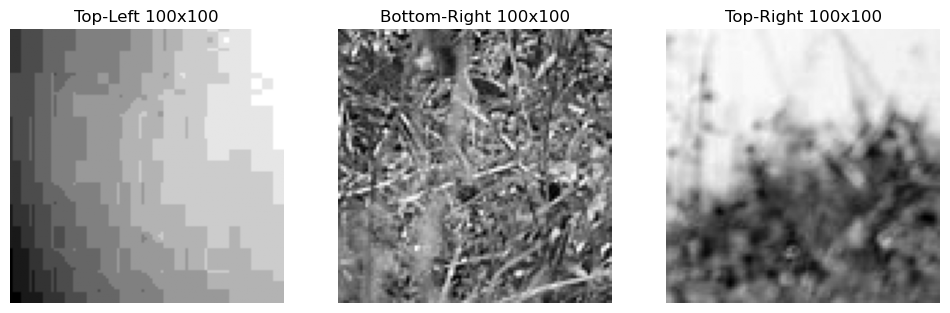

In [27]:
# Top-left 100x100 crop
top_left_crop = img_array[0:100, 0:100]
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(top_left_crop, cmap='gray')
plt.title("Top-Left 100x100")
plt.axis('off')

# Bottom-right 100x100 crop
bottom_right_crop = img_array[-100:, -100:]
plt.subplot(1,3,2)
plt.imshow(bottom_right_crop, cmap='gray')
plt.title("Bottom-Right 100x100")
plt.axis('off')

# Top-right 100x100 crop
top_right_crop = img_array[0:100, -100:]
plt.subplot(1,3,3)
plt.imshow(top_right_crop, cmap='gray')
plt.title("Top-Right 100x100")
plt.axis('off')

plt.show()

#### 8. Create a Negative Image

Use 255 - img to invert pixel values and create a negative effect.

What do brighter and darker areas become?
What kind of images could this be useful for?

#### 9. Rotate the Image

Rotate the image 90 degrees using np.rot90(img, k=...).

- Try different values of k (1, -1, 2, etc.).

- How does this differ from transpose and flip?

#### 10. Combine Multiple Transformations